## Logistic Regression with PCA for 7 Zooplanktons

In [1]:
import pandas as pd

# Load the merged dataset
data_path = "/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_Subset_2.csv"  # Update path if necessary
df = pd.read_csv(data_path)

# Display dataset info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (457454, 53)


,tifffile,csvfile,Year,SAM,Month,Day,repnum,Loc,SITE,DOY,...,Sigma.Intensity,Roughness,Transparency,Image.File,Particle.ID,Image.Height,Image.Width,Image.X,Image.Y,Filename
0,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,66.7480,1.8286,0.3171,04072021_Huron_10_2mm_Rep2_AD_000002.tif,99,130,95,870,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv
1,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,65.6102,1.4038,0.2648,04072021_Huron_10_2mm_Rep2_AD_000005.tif,415,111,99,596,380,20210407_FISHI_010_2mm_Rep2_VC_data.csv
2,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,67.8257,1.2653,0.3878,04072021_Huron_10_2mm_Rep2_AD_000010.tif,905,109,117,901,1105,20210407_FISHI_010_2mm_Rep2_VC_data.csv
3,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,40.7299,1.2742,0.2844,04072021_Huron_10_2mm_Rep2_AD_000019.tif,1649,97,72,1029,247,20210407_FISHI_010_2mm_Rep2_VC_data.csv
4,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,61.2308,1.3379,0.2839,04072021_Huron_10_2mm_Rep2_AD_000020.tif,1736,115,93,171,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv


In [2]:
features = [
    "Class",          # Target Variable
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "DOY",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature (Chosen over Perimeter, Area)
]

df = df[features]

# Display selected columns
print("Selected Features:", df.columns)

df.head()

print("Missing Values per Column:\n", df.isnull().sum())

# Print out the rows with missing values in these columns
missing_values = df[df.isnull().any(axis=1)]
print("Rows with Missing Values:\n", missing_values)

Selected Features: Index(['Class', 'WaterT', 'AvgDepth', 'PRECIP', 'DOY', 'Aspect.Ratio',
       'Circularity', 'Diameter..ABD.'],
      dtype='object')
Missing Values per Column:
 Class             0
WaterT            0
AvgDepth          0
PRECIP            0
DOY               0
Aspect.Ratio      0
Circularity       0
Diameter..ABD.    0
dtype: int64
Rows with Missing Values:
 Empty DataFrame
Columns: [Class, WaterT, AvgDepth, PRECIP, DOY, Aspect.Ratio, Circularity, Diameter..ABD.]
Index: []


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Feature selection
features = [
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "DOY",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature
]

# 1. Split original data
X = df[features]
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Apply SMOTE only on training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 4. Train the model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train_resampled)

# 5. Evaluate
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))


/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


               precision    recall  f1-score   support

    Bosmina_1      0.556     0.803     0.657      1445
   Calanoid_1      0.814     0.485     0.608     49678
   Chironomid      0.096     0.831     0.173       308
   Chydoridae      0.002     0.476     0.004        21
  Cyclopoid_1      0.725     0.623     0.670     39579
      Daphnia      0.009     0.545     0.017       112
Herpacticoida      0.019     0.595     0.037       348

     accuracy                          0.551     91491
    macro avg      0.317     0.623     0.309     91491
 weighted avg      0.765     0.551     0.631     91491



## Logistic Regression with PCA for All Zooplanktons

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load data
merged_df = pd.read_csv("/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_All_Clean.csv")

# Convert WIND to numeric direction and speed
merged_df["WIND"] = merged_df["WIND"].astype(str)
wind_split = merged_df["WIND"].str.split("-", expand=True)
merged_df["wind_direction"] = pd.to_numeric(wind_split[0], errors="coerce")
merged_df["wind_speed"] = pd.to_numeric(wind_split[1], errors="coerce")
merged_df.drop(columns=["WIND"], inplace=True)

# Feature list
features = [
    "Loc", "SITE", "DOY", "gdd2", "WaterT", "LAT0", "LAT1", "LON0", "LON1",
    "avgdepth", "XANGLE", "PRECIP", "XWAVEHT", "wind_direction", "wind_speed",
    "CLOUD_PC", "AvgDepth", "Area..ABD.", "Aspect.Ratio", "Circularity",
    "Compactness", "Convexity", "Elongation", "Diameter..ABD.",
    "Diameter..ESD.", "Perimeter", "Intensity", "Sigma.Intensity",
    "Roughness", "Transparency"
]

# One-hot encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=["Loc", "SITE"], prefix=["Loc", "SITE"])
features = [f for f in features if f not in ["Loc", "SITE"]]  # remove original
features += [col for col in merged_df.columns if col.startswith("Loc_") or col.startswith("SITE_")]

# Prepare feature matrix and target
X = merged_df[features]
y = merged_df["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))



/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8167624795800027
Classification Report:
               precision    recall  f1-score   support

    Bosmina_1      0.786     0.839     0.812      1325
      Bubbles      0.939     0.948     0.943       904
   Calanoid_1      0.774     0.819     0.796     16025
   Chironomid      0.722     0.572     0.639       304
   Chydoridae      0.000     0.000     0.000        19
   CopepodSpp      0.476     0.222     0.303      1763
   CountGT500      0.704     0.241     0.359      2498
      Cyclo_2      0.619     0.236     0.342      3335
  Cyclopoid_1      0.709     0.896     0.792     17282
      Daphnia      0.619     0.160     0.255        81
       Floc_1      0.912     0.916     0.914     19695
Herpacticoida      0.463     0.259     0.333       293
     LargeZ-1      0.940     0.942     0.941     15662
        other      0.329     0.069     0.114      1005

     accuracy                          0.817     80191
    macro avg      0.642     0.509     0.539     80191
 weighted a

### Without PCA

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load data
merged_df = pd.read_csv("/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_All_Clean.csv")

# Convert WIND to numeric direction and speed
merged_df["WIND"] = merged_df["WIND"].astype(str)
wind_split = merged_df["WIND"].str.split("-", expand=True)
merged_df["wind_direction"] = pd.to_numeric(wind_split[0], errors="coerce")
merged_df["wind_speed"] = pd.to_numeric(wind_split[1], errors="coerce")
merged_df.drop(columns=["WIND"], inplace=True)

# Feature list
features = [
    "Loc", "SITE", "DOY", "gdd2", "WaterT", "LAT0", "LAT1", "LON0", "LON1",
    "avgdepth", "XANGLE", "PRECIP", "XWAVEHT", "wind_direction", "wind_speed",
    "CLOUD_PC", "AvgDepth", "Area..ABD.", "Aspect.Ratio", "Circularity",
    "Compactness", "Convexity", "Elongation", "Diameter..ABD.",
    "Diameter..ESD.", "Perimeter", "Intensity", "Sigma.Intensity",
    "Roughness", "Transparency"
]

# One-hot encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=["Loc", "SITE"], prefix=["Loc", "SITE"])
features = [f for f in features if f not in ["Loc", "SITE"]]  # remove original
features += [col for col in merged_df.columns if col.startswith("Loc_") or col.startswith("SITE_")]

# Prepare feature matrix and target
X = merged_df[features]
y = merged_df["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model (no PCA)
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8165629559426868
Classification Report:
               precision    recall  f1-score   support

    Bosmina_1      0.788     0.839     0.813      1325
      Bubbles      0.938     0.949     0.943       904
   Calanoid_1      0.774     0.818     0.795     16025
   Chironomid      0.720     0.576     0.640       304
   Chydoridae      0.000     0.000     0.000        19
   CopepodSpp      0.478     0.221     0.302      1763
   CountGT500      0.704     0.239     0.357      2498
      Cyclo_2      0.622     0.234     0.340      3335
  Cyclopoid_1      0.708     0.897     0.792     17282
      Daphnia      0.619     0.160     0.255        81
       Floc_1      0.912     0.916     0.914     19695
Herpacticoida      0.475     0.263     0.338       293
     LargeZ-1      0.940     0.942     0.941     15662
        other      0.336     0.071     0.117      1005

     accuracy                          0.817     80191
    macro avg      0.644     0.509     0.539     80191
 weighted a

'/mnt/data/model_performance_histogram_bordered.png'

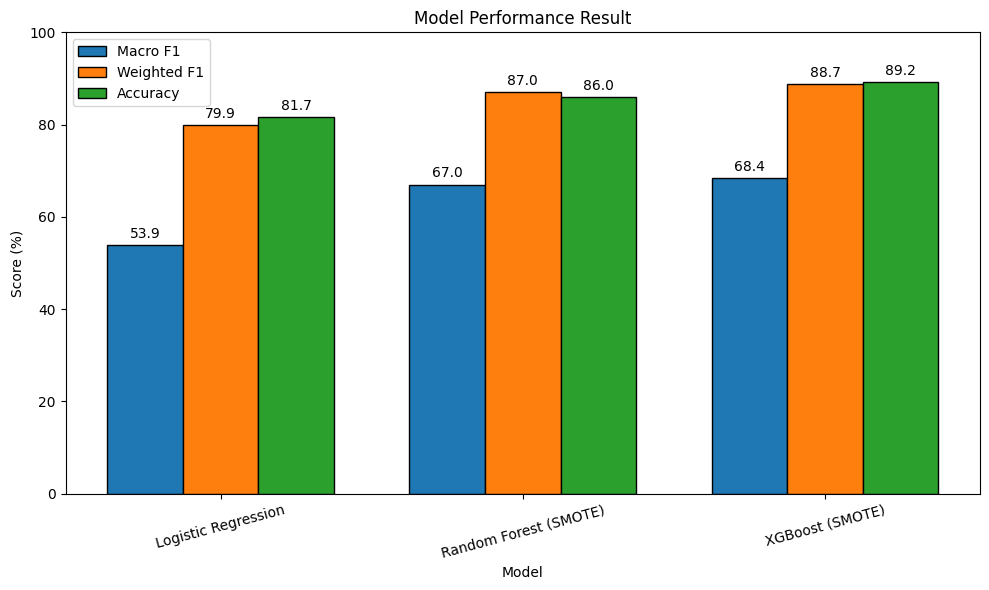

In [11]:
# Re-import libraries after code environment reset
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective scores
models = ["Logistic Regression", "Random Forest (SMOTE)", "XGBoost (SMOTE)"]

macro_f1 = [53.9, 67.0, 68.4]
weighted_f1 = [79.9, 87.0, 88.7]
accuracy = [81.7, 86.0, 89.2]

# Plotting the histogram
x = np.arange(len(models))
width = 0.25

# Plotting the histogram with black borders and Accuracy on the right
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width, macro_f1, width, label="Macro F1", edgecolor='black')
bars2 = plt.bar(x, weighted_f1, width, label="Weighted F1", edgecolor='black')
bars3 = plt.bar(x + width, accuracy, width, label="Accuracy", edgecolor='black')

# Add value labels on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.xlabel("Model")
plt.ylabel("Score (%)")
plt.title("Model Performance Result")
plt.xticks(x, models, rotation=15)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()

bordered_histogram_path

# Save and return the plot
#histogram_path = "/mnt/data/model_performance_histogram.png"
#plt.savefig(histogram_path)
#plt.close()
